In [3]:
import util
import search
from graphviz import Graph, Digraph
from IPython.display import display

# Uninformed Search

## A search problem

In [6]:
class graph_problem(search.SearchProblem):
    def __init__(self, vertices, edges):
        self.G = {v:{} for v in vertices}
        for v1, v2, c in edges1:
            (self.G[v1])[v2] = c
            (self.G[v2])[v1] = c
        self.start = vertices[0]
        self.goal = vertices[-1]
        
    def getStartState(self):
        return self.start

    def isGoalState(self, state):
        return self.goal == state

    def getSuccessors(self, state):
        successors = [(suc, state + '->' + suc, 
                       (self.G[state])[suc]) for suc in self.G[state]]
        return successors
    
    def getDot(self, color):
        dot = Graph(graph_attr = {'size':'5'})
        for node in self.G:
            if not node in color:
                dot.node(node)
            else:
                dot.node(node, style = 'filled', color = color[node])
        for n1 in self.G:
            for n2 in self.G[n1]:
                if n1 < n2:
                    dot.edge(n1, n2)
        return dot


{'s51': {'s42': 1}, 's00': {'s02': 1, 's50': 1}, 's12': {'s30': 1}, 's02': {'s00': 1, 's20': 1}, 's30': {'s12': 1, 's32': 1}, 's32': {'s52': 1, 's30': 1, 's50': 1}, 's22': {'s20': 1, 's40': 1}, 's20': {'s22': 1, 's02': 1}, 's40': {'s22': 1, 's42': 1}, 's52': {'s32': 1}, 's42': {'s40': 1, 's51': 1}, 's50': {'s00': 1, 's32': 1}}
{'s00': 1, 's32': 1}
s00
True


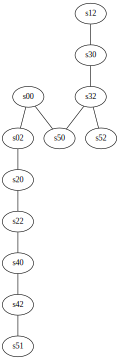

In [7]:
edges1 = [('s00', 's50', 1), ('s00', 's02', 1), ('s50', 's32', 1),('s32','s52', 1),
         ('s32', 's30', 1), ('s30', 's12', 1), ('s02', 's20', 1), ('s20', 's22', 1),
         ('s22', 's40', 1), ('s42', 's40', 1), ('s51', 's42', 1)]
vertices1 = ['s00', 's50', 's02', 's32', 's52', 's30', 's12', 's20', 's22', 's40', 's42', 's51'] 
problem1 = graph_problem(vertices1, edges1)
print problem1.G
print problem1.G['s50']
print problem1.getStartState()
print problem1.isGoalState('s51')
dot = problem1.getDot({})
display(dot)

## General graph search

In [8]:
class search_tree():
    def __init__(self):
        self.graph = Digraph()
        
    def addEdge(self, source, action, target):
        self.graph.edge(source, target, action)
    
    def getDot(self):
        return self.graph


In [9]:
def general_ui_search(problem, frontier_class):
    visited = {}
    tree = search_tree()
    state = problem.getStartState()
    visited[state] = 'gray'
#    display(problem.getDot(visited))
    frontier = frontier_class()
    frontier.push((state, []))
    while not frontier.isEmpty():
        u, actions = frontier.pop()
#        print 'Pop:', u 
        for v, action, cost in problem.getSuccessors(u):
            if not v in visited:
                tree.addEdge(u, action, v)
                if problem.isGoalState(v):
                    return  actions + [action], tree
                visited[v] = 'gray'
                frontier.push((v, actions + [action]))
#            display(problem.getDot(visited))
#            display(tree.getDot())
        visited[u] = 'green'
    return [], tree

## Depth-first search

In [10]:
def dfs(problem):
   return general_ui_search(problem, util.Stack) 

['s00->s02', 's02->s20', 's20->s22', 's22->s40', 's40->s42', 's42->s51']


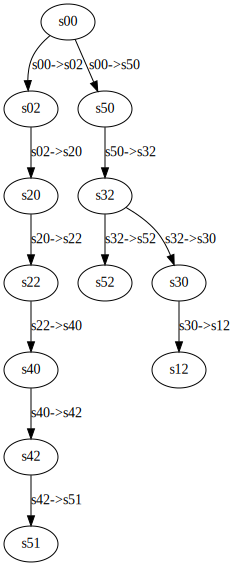

In [11]:
actions, tree = dfs(problem1)
print actions
display(tree.getDot())

## Breadth-first search

In [12]:
def bfs(problem):
   return general_ui_search(problem, util.Queue) 

['s00->s02', 's02->s20', 's20->s22', 's22->s40', 's40->s42', 's42->s51']


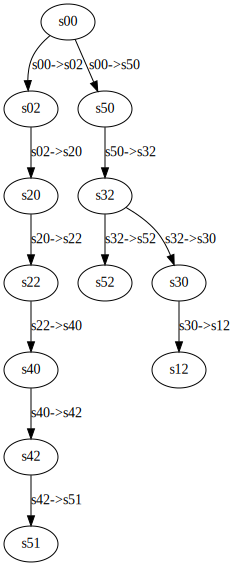

In [13]:
actions1, tree1 = bfs(problem1)
print actions
display(tree1.getDot())